In [1]:
import numpy as np
import copy
import math
import time
import random
import matplotlib.pyplot as plt

In [2]:

def getInitialBoard():
    board = np.zeros(shape=(8,8))

    board[0][1] = 2
    board[0][3] = 2
    board[0][5] = 2
    board[0][7] = 2

    board[1][0] = 2
    board[1][2] = 2
    board[1][4] = 2
    board[1][6] = 2

    board[2][1] = 2
    board[2][3] = 2
    board[2][5] = 2
    board[2][7] = 2


    board[5][0] = 1
    board[5][2] = 1
    board[5][4] = 1
    board[5][6] = 1

    board[6][1] = 1
    board[6][3] = 1
    board[6][5] = 1
    board[6][7] = 1

    board[7][0] = 1
    board[7][2] = 1
    board[7][4] = 1
    board[7][6] = 1
    
    return board

In [3]:


def evaluationFun(board,player):
    val,play=gameIsSolved(board)
    lengthTwo = np.count_nonzero(board == 2)
    lengthOne = np.count_nonzero(board == 1)
    if player==1:
        if val and play==2:
            return +100 
        elif val and play==1:
            return -100
        else:
            return lengthOne-lengthTwo
    else:
        if val and play==2:
            return -100
        elif val and play==1:
            return +100
        else:
            return lengthTwo-lengthOne

def isAttackValid(i,j,board,player,dir):
    if player==1:
        if dir=="LEFT":
            if isItInBounds(i-2,j-2) and board[i-2][j-2]==0:
                return True
        if dir=="RIGHT":
            if isItInBounds(i-2,j+2) and board[i-2][j+2]==0:
                return True
        pass
    elif player==2:
        if dir=="LEFT":
            if isItInBounds(i+2,j-2) and board[i+2][j-2]==0:
                return True
        if dir=="RIGHT":
            if isItInBounds(i+2,j+2) and board[i+2][j+2]==0:
                return True

'''
kings are presented as 4 for 2
and 3 for 1
black is 1
can be called firstVar,_ = gameIsSolved(board)
'''
def gameIsSolved(board):
    lengthTwo = np.count_nonzero(board == 2)
    lengthOne = np.count_nonzero(board == 1)
    if lengthOne==0:
        return True,2
    elif lengthTwo==0:
        return True,1
    else:
        return False,None


def isAttackAvailable(i,j,board,player):
    if player==1:
        # direction left
        if isItInBounds(i-1, j-1) and board[i-1][j-1]==2  and isItInBounds(i-2,j-2) and board[i-2][j-2]==0:
            return True
            
            
        # direction right
        if isItInBounds(i-1, j+1) and board[i-1][j+1]==2 and isItInBounds(i-2,j+2) and board[i-2][j+2]==0:
            return True
            
        
    elif player==2:
        # direction left
        if isItInBounds(i+1,j-1) and board[i+1][j-1]==1  and isItInBounds(i+2,j-2) and board[i+2][j-2]==0:
            return True
        

        # direction right
        if isItInBounds(i+1, j+1) and board[i+1][j+1]==1 and isItInBounds(i+2,j+2) and board[i+2][j+2]==0:
            return True
    else:
        return False


def isItInBounds(i,j):
    if i>=0 and i<=7 and j>=0 and j<=7:
        return True
    else:
        return False

def isThereAnAttackOnBoard(board, player):
    for i in range(8):
        for j in range(8):
            if board[i][j]  == 1: # player one
                listOfAttacks=isAttackAvailable(i,j,board,1)
                if listOfAttacks != []:
                    if player == 1:
                        return True
                
            elif board[i][j] == 2: # player two
                listOfAttacks=isAttackAvailable(i,j,board,2)
                if listOfAttacks != []:
                    if player == 2:
                        return True
    
    return False


def whereIsTheAttack(i,j,board, player):
    attacks = []

    if player==2:
        if isItInBounds(i+1,j-1) and board[i+1][j-1] == 1 and isAttackValid(i,j,board,2,"LEFT"):
            attacks.append("LEFT")
        if  isItInBounds(i+1,j+1) and board[i+1][j+1]==1 and isAttackValid(i,j,board,2,"RIGHT"):
            attacks.append("RIGHT")
        return attacks
    elif player==1:
            if isItInBounds(i-1,j-1) and 2 == board[i-1][j-1] and isAttackValid(i,j,board,1,"LEFT"):
                attacks.append("LEFT")
            if isItInBounds(i-1,j+1) and 2 == board[i-1][j+1] and isAttackValid(i,j,board,1,"RIGHT"):
                attacks.append("RIGHT")
    return attacks


'''
we call it before we reach the end obv
'''
def canWeQueen(i,j,player):
    if player==1:
        if i+1==0:
            return True
    elif player==2:
        if i+1==7:
            return True

In [4]:
def move(player,board):
    bestScore = -math.inf
    moves = getPossibleMoves(player, board)
    moveloc = moves[0]
    for position in moves:
        if player==1:
            score = alphabeta(position, 3, -math.inf, math.inf, True, 1,1)
        elif player==2: 
            score = alphabeta(position, 3, -math.inf, math.inf, True, 2,2)
        if score > bestScore:
            bestScore = score
            moveLoc = position
    return moveLoc

'''
initial call:
minimax(currentPosition, 3, -∞, +∞, true)
'''
def alphabeta(board,depth,alpha,beta,maxPlayer, player, initialPlayer):
    
    smallBool,_ = gameIsSolved(board)
    if smallBool or depth==0:
        return evaluationFun(board,initialPlayer)
        
    if player==1:
        player=2
    elif player==2:
        player=1

    if maxPlayer:
        bestValue = -math.inf
        for move in getPossibleMoves(player,board):
            value = alphabeta(move,depth-1,alpha,beta, False, player,initialPlayer)
            bestValue = max(bestValue,value)
            alpha = max(alpha, value)
            if beta <= alpha:
                break
        return bestValue
        
    else:
        smallValue = math.inf
        for move in getPossibleMoves(player,board):
            value = alphabeta(move,depth-1,alpha,beta, True, player,initialPlayer)
            smallValue = min(smallValue,value)
            beta = min(beta, value)
            if beta <= alpha:
                break
        return smallValue

def printBoard(board):
    plt.imshow(board)
    plt.show()


def startGame():
    board = getInitialBoard()
    # create player objects
    player = 1
    while(True):
        print("initial player", player)
        plt.imshow(board)
        plt.title("player=%i" %player)
        plt.show()
        board = move(player,board)
        boolis, playerWon = gameIsSolved(board)
        if boolis:
            print(playerWon, "Won!")
            break
        if player==1:
            player=2
        elif player==2:
            player=1

In [5]:

def getPossibleMoves(player,board):
    moves = []
    if player==1:
        for x in range(8):
            for y in range(8):
                if board[x][y]==1:
                    if not isAttackAvailable(x,y,board,1):

                        # left
                        if isItInBounds(x-1,y-1) and board[x-1][y-1]==0:
                                edit = copy.deepcopy(board)
                                edit[x][y]=0
                                edit[x-1][y-1]=1
                                moves.append(edit)

                        # right
                        if isItInBounds(x-1,y+1) and board[x-1][y+1]==0:
                                edit = copy.deepcopy(board)
                                edit[x][y]=0
                                edit[x-1][y+1]=1
                                moves.append(edit)
                    else:
                        # there is an attack
                        directionList = whereIsTheAttack(x,y,board,1)
                        for dir in directionList:
                            if dir=="LEFT":
                                # first jump left
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x-1][y-1]=0
                                copyBoard[x-2][y-2]=1
                                newX,newY = x-2,y-2
                                if isAttackAvailable(newX,newY,copyBoard,1):
                                    firstLeftdirectionList = whereIsTheAttack(newX,newY,copyBoard,1)
                                    for firstLeftDir in firstLeftdirectionList:
                                        if firstLeftDir == "LEFT":
                                            # second attack left
                                            firstLeftBoard = copy.deepcopy(copyBoard)
                                            firstLeftBoard[newX][newY]=0
                                            firstLeftBoard[newX-1][newY-1]=0
                                            firstLeftBoard[newX-2][newY-2]=1
                                            firstLeftX,firstLeftY = newX-2, newY-2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstLeftBoard,1):
                                                secondLeftDirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstLeftBoard,1)
                                                for secondLeftDir in secondLeftDirectionList:
                                                    if secondLeftDir == "LEFT":
                                                        # third left
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstLeftBoard)
                                        else:
                                            #second attack right
                                            firstRightBoard = copy.deepcopy(copyBoard)
                                            firstRightBoard[newX][newY]=0
                                            firstRightBoard[newX-1][newY+1]=0
                                            firstRightBoard[newX-2][newY+2]=1
                                            firstLeftX,firstLeftY = newX-2, newY+2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstRightBoard,1):
                                                secondLeftDirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstRightBoard,1)
                                                for secondLeftDir in secondLeftDirectionList:
                                                    if secondLeftDir == "LEFT":
                                                        # third left
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstRightBoard)
                                else:
                                    moves.append(copyBoard)
                            else:
                                # first jump right
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x-1][y+1]=0
                                copyBoard[x-2][y+2]=1
                                newX,newY = x-2,y+2
                                if isAttackAvailable(newX,newY,copyBoard,1):
                                    firstLeftdirectionList = whereIsTheAttack(newX,newY,copyBoard,1)
                                    for firstLeftDir in firstLeftdirectionList:
                                        if firstLeftDir == "LEFT":
                                            # second attack left
                                            firstLeftBoard = copy.deepcopy(copyBoard)
                                            firstLeftBoard[newX][newY]=0
                                            firstLeftBoard[newX-1][newY-1]=0
                                            firstLeftBoard[newX-2][newY-2]=1
                                            firstLeftX,firstLeftY = newX-2, newY-2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstLeftBoard,1):
                                                firstLeftdirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstLeftBoard,1)
                                                for firstLeftDir in firstLeftdirectionList:
                                                    if firstLeftDir == "LEFT":
                                                        #third left
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstLeftBoard)
                                        else:
                                            #second attack right
                                            firstRightBoard = copy.deepcopy(copyBoard)
                                            firstRightBoard[newX][newY]=0
                                            firstRightBoard[newX-1][newY+1]=0
                                            firstRightBoard[newX-2][newY+2]=1
                                            firstLeftX,firstLeftY = newX-2, newY+2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstRightBoard,1):
                                                firstLeftdirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstRightBoard,1)
                                                for firstLeftDir in firstLeftdirectionList:
                                                    if firstLeftDir == "LEFT":
                                                        #third left
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstRightBoard)
                                else:
                                    moves.append(copyBoard)

    elif player==2:
        for x in range(8):
            for y in range(8):
                if board[x][y]==2:
                    if not isAttackAvailable(x,y,board,2):
                        # left
                        if isItInBounds(x+1,y-1) and board[x+1][y-1]==0:
                            edit = copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x+1][y-1]=2
                            moves.append(edit)
                        # right
                        if isItInBounds(x+1,y+1) and board[x+1][y+1]==0:
                            edit= copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x+1][y+1]=2
                            moves.append(edit)
                    else:
                        # there is an attack
                        directionList = whereIsTheAttack(x,y,board,2)
                        for dir in directionList:
                            if dir=="LEFT":
                                # first jump left
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x+1][y-1]=0
                                copyBoard[x+2][y-2]=2
                                newX,newY = x+2, y-2
                                if isAttackAvailable(newX,newY,copyBoard,2):
                                    firstLeftdirectionList = whereIsTheAttack(newX,newY,copyBoard,2)
                                    for secondDirection in firstLeftdirectionList:
                                        if secondDirection == "LEFT":
                                            # second
                                            newBoardSec = copy.deepcopy(copyBoard)
                                            newBoardSec[newX][newY]=0
                                            newBoardSec[newX+1][newY-1]=0
                                            newBoardSec[newX+2][newY-2]=2
                                            firstRightX,firstRightY = newX+2, newY-2
                                            if isAttackAvailable(firstRightX,firstRightY,newBoardSec,2):
                                                secondLeftDirectionList = whereIsTheAttack(firstRightX,firstRightY,newBoardSec,2)
                                                for SLD in secondLeftDirectionList:
                                                    if SLD=="LEFT":
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[newX][newY]=0
                                                        newBoardThird[newX+1][newY-1]=0
                                                        newBoardThird[newX+2][newY-2]=2
                                                        moves.append(newBoardThird)
                                                    else:
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[x][y]=0
                                                        newBoardThird[x+1][y+1]=0
                                                        newBoardThird[x+2][y+2]=2
                                                        moves.append(newBoardThird)
                                            else:
                                                moves.append(newBoardSec)
                                        else:
                                            #second
                                            newBoardSec = copy.deepcopy(copyBoard)
                                            newBoardSec[newX][newY]=0
                                            newBoardSec[newX+1][newY+1]=0
                                            newBoardSec[newX+2][newY+2]=2
                                            firstRightX,firstRightY = newX+2, newY+2
                                            if isAttackAvailable(firstRightX,firstRightY,newBoardSec,2):
                                                secondLeftDirectionList = whereIsTheAttack(firstRightX,firstRightY,newBoardSec,2)
                                                for SLD in secondLeftDirectionList:
                                                    if SLD=="LEFT":
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[firstRightX][firstRightY]=0
                                                        newBoardThird[firstRightX+1][firstRightY-1]=0
                                                        newBoardThird[firstRightX+2][firstRightY-2]=2
                                                        moves.append(newBoardThird)
                                                    else:
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[firstRightX][firstRightY]=0
                                                        newBoardThird[firstRightX+1][firstRightY+1]=0
                                                        newBoardThird[firstRightX+2][firstRightY+2]=2
                                                        moves.append(newBoardThird)
                                            else:
                                                moves.append(newBoardSec)

                                else:
                                    moves.append(copyBoard)
                            else:
                                # first jump right
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x+1][y+1]=0
                                copyBoard[x+2][y+2]=2
                                newX,newY = x+2,y+2
                                if isAttackAvailable(newX,newY,copyBoard,2):
                                    firstRightBoard = whereIsTheAttack(newX,newY,copyBoard,2)
                                    for FRB in firstRightBoard:
                                        if FRB=="LEFT":
                                            # second
                                            secondBoard = copy.deepcopy(copyBoard)
                                            secondBoard[newX][newY]=0
                                            secondBoard[newX+1][newY-1]=0
                                            secondBoard[newX+2][newY-2]=2
                                            secondRightX,secondRightY = newX+2,newY-2
                                            if isAttackAvailable(secondRightX,secondRightY,secondBoard,2):
                                                newSecondList = whereIsTheAttack(secondRightX,secondRightY,secondBoard,2)
                                                for NSL in newSecondList:
                                                    if NSL=="LEFT":
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY-1]=0
                                                        thirdBoard[secondRightX+2][secondRightY-2]=2
                                                        moves.append(thirdBoard)
                                                    else:
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY+1]=0
                                                        thirdBoard[secondRightX+2][secondRightY+2]=2
                                                        moves.append(thirdBoard)
                                            else:
                                                moves.append(secondBoard)
                                        else:
                                            # second
                                            secondBoard = copy.deepcopy(copyBoard)
                                            secondBoard[newX][newY]=0
                                            secondBoard[newX+1][newY+1]=0
                                            secondBoard[newX+2][newY+2]=2
                                            secondRightX,secondRightY = newX+2,newY+2
                                            if isAttackAvailable(secondRightX,secondRightY,secondBoard,2):
                                                newSecondList = whereIsTheAttack(secondRightX,secondRightY,secondBoard,2)
                                                for NSL in newSecondList:
                                                    if NSL=="LEFT":
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY-1]=0
                                                        thirdBoard[secondRightX+2][secondRightY-2]=2
                                                        moves.append(thirdBoard)
                                                    else:
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY+1]=0
                                                        thirdBoard[secondRightX+2][secondRightY+2]=2
                                                        moves.append(thirdBoard)
                                            else:
                                                moves.append(secondBoard)
                                else:
                                    moves.append(copyBoard)




    return moves

initial player 1


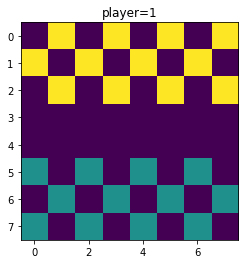

initial player 2


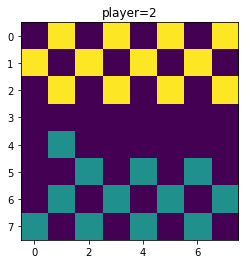

initial player 1


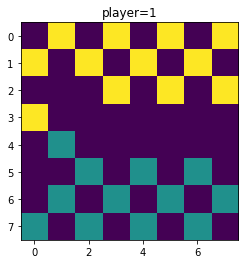

initial player 2


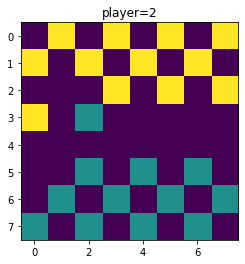

initial player 1


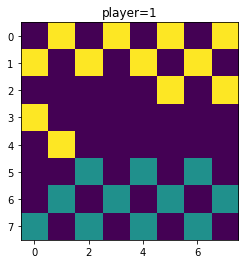

initial player 2


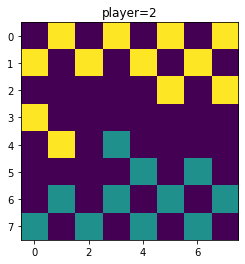

initial player 1


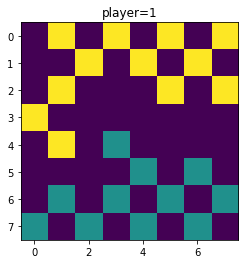

initial player 2


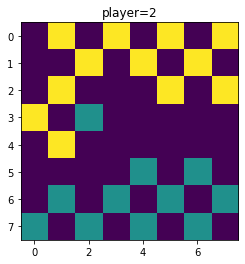

initial player 1


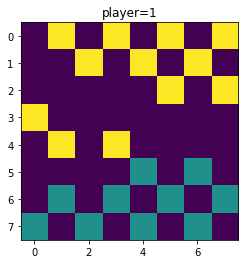

initial player 2


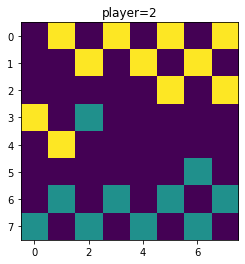

initial player 1


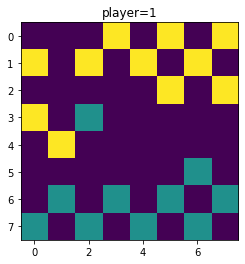

initial player 2


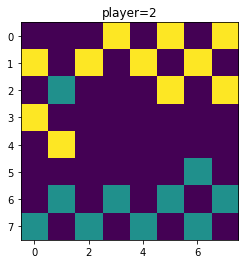

initial player 1


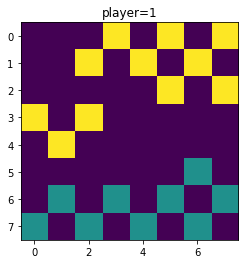

initial player 2


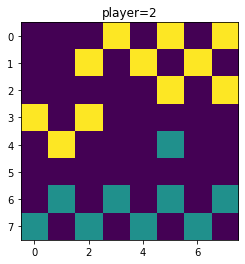

initial player 1


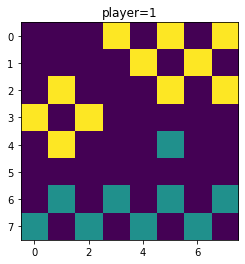

initial player 2


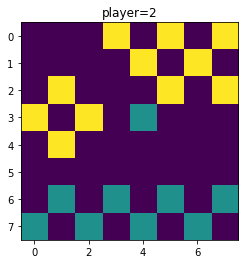

initial player 1


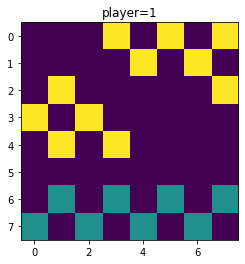

initial player 2


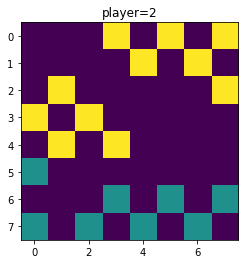

initial player 1


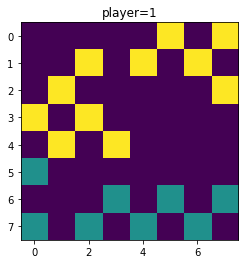

initial player 2


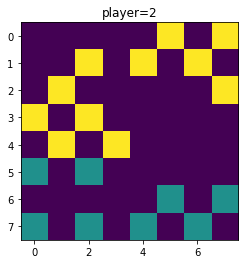

initial player 1


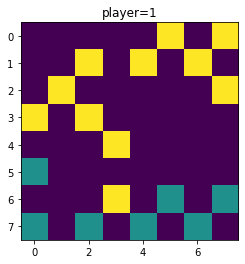

initial player 2


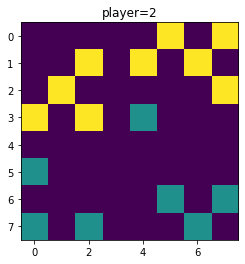

initial player 1


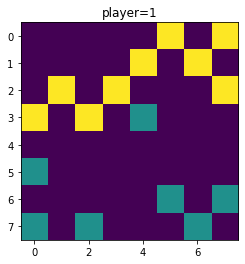

initial player 2


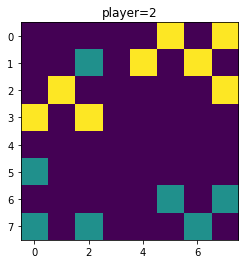

initial player 1


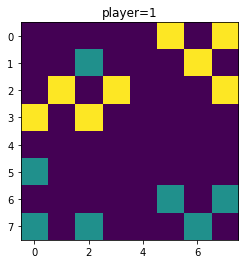

initial player 2


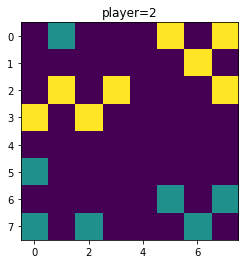

initial player 1


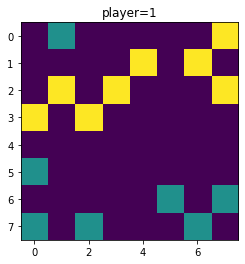

initial player 2


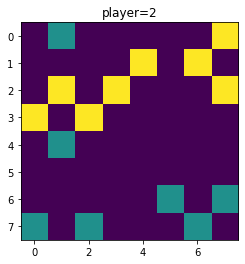

initial player 1


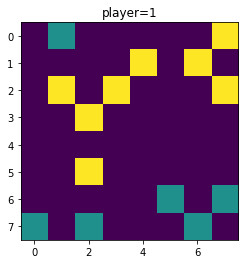

initial player 2


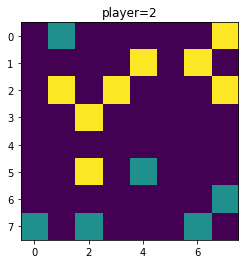

initial player 1


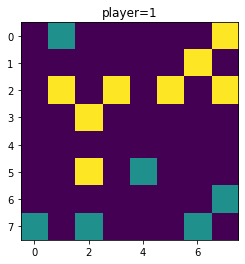

initial player 2


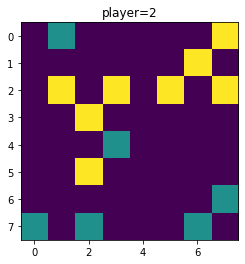

initial player 1


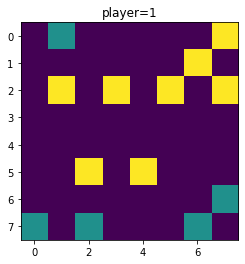

initial player 2


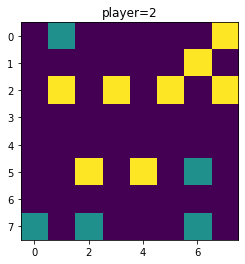

initial player 1


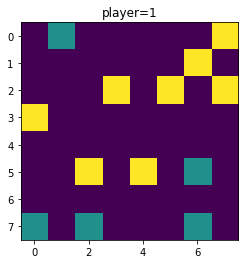

initial player 2


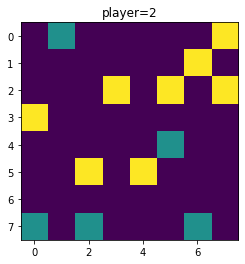

initial player 1


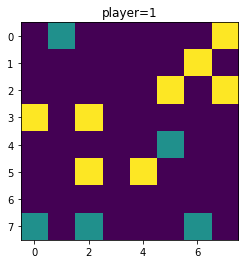

initial player 2


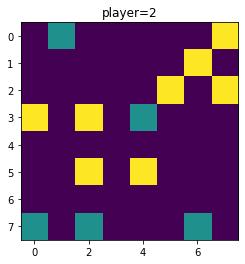

initial player 1


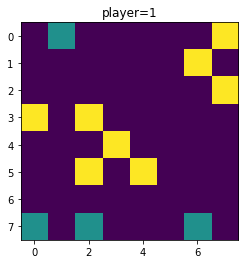

initial player 2


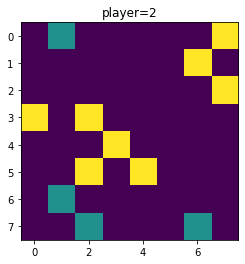

initial player 1


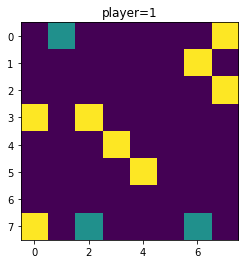

initial player 2


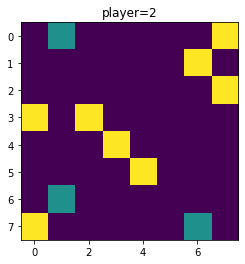

initial player 1


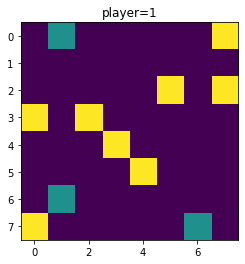

initial player 2


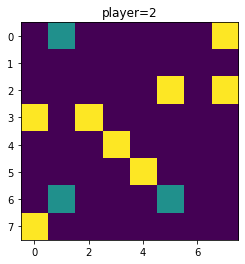

initial player 1


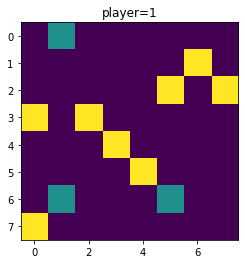

initial player 2


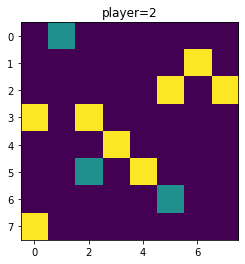

initial player 1


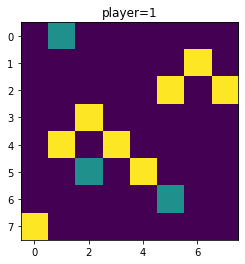

initial player 2


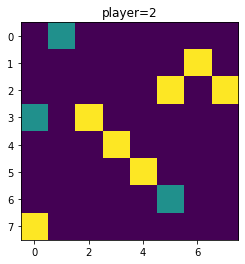

initial player 1


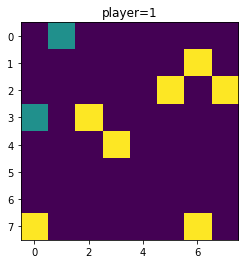

initial player 2


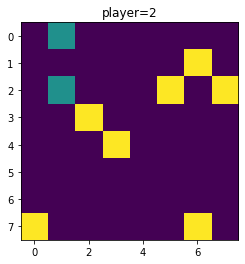

initial player 1


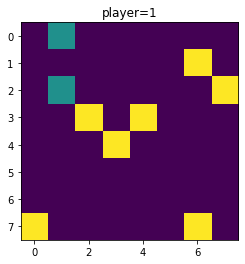

initial player 2


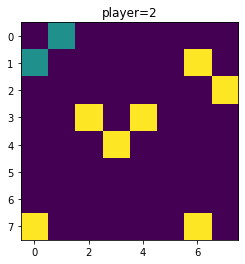

UnboundLocalError: local variable 'moveLoc' referenced before assignment

In [6]:
if __name__ == "__main__":
    startGame()
    '''board = np.zeros((8,8))
    board[1][1]=2
    board[2][2]=1
    board[4][2]=1
    board[4][4]=1

    board[6][2]=1
    board[6][4]=1
    board[6][6]=1
    print(board)
    for move in getPossibleMoves(2,board):
        printBoard(move)'''